In [1]:
import koreanize_matplotlib
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

/tmp/ipykernel_13865/3961791937.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


데이터베이스에서 수집 및 정리된 데이터 가져오기

In [2]:
db = mysql.connector.Connect(
    host='database-1.cls80ok4wdvh.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='min',
    password='addinedu1234!',
    database='OliveYoung'
)

cur = db.cursor(buffered=True)

In [3]:
def base_to_df(table_name):
    # 테이블에서 데이터 가져오기
    cur.execute(f'SELECT * FROM {table_name}')
    result = cur.fetchall()
    # 컬럼 이름 가져오기
    cur.execute(f'DESC {table_name}')
    column_info = cur.fetchall()
    column_names = [col[0] for col in column_info]
    # DataFrame 생성 및 컬럼 이름 설정
    df = pd.DataFrame(result, columns=column_names)
    return df

In [4]:
skin_df = base_to_df('skin')
skin_df.head()

,브랜드명,제품명,원가,세일가,평점 갯수,평점,건성,복합성,지성,보습,진정,주름/미백,자극x,보통,자극O,성분
0,바이오더마,바이오더마 하이드라비오 토너 500ml,38000,25000,8079,4.8,37,52,11,70,30,1,76,22,2,"정제수,글리세린,폴리솔베이트20,다이소듐이디티에이,세트리모늄브로마이드,향료,나이아신..."
1,토리든,토리든 다이브인 저분자 히알루론산 토너 500ml 기획,29000,18810,8847,4.8,33,54,13,59,41,1,75,25,1,"1.다이브인저분자히알루론산토너500ml정제수,부틸렌글라이콜,다이프로필렌글라이콜,1,..."
2,비욘드,비욘드 엔젤아쿠아 수분 진정 토너 500ml,19000,10900,2049,4.8,24,61,15,44,56,1,67,31,2,"정제수,다이프로필렌글라이콜,부틸렌글라이콜,1,2-헥산다이올,프로판다이올,폴리글리세릴..."
3,아누아,아누아 어성초 77 수딩 토너 350ml 리필 기획세트,49000,34000,13465,4.8,20,60,20,23,77,1,76,24,1,"약모밀추출물,정제수,1,2-헥산다이올,글리세린,베타인,병풀추출물,체이스트트리추출물,..."
4,비욘드,비욘드 엔젤아쿠아 보습장벽 토너 500ml,19000,10900,727,4.8,49,46,5,76,20,4,74,24,2,"정제수,다이프로필렌글라이콜,글리세린,1,2-헥산다이올,나이아신아마이드,헥실데실에틸헥..."


In [5]:
db.close()
skin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   브랜드명    324 non-null    object 
 1   제품명     324 non-null    object 
 2   원가      324 non-null    int64  
 3   세일가     324 non-null    int64  
 4   평점 갯수   324 non-null    int64  
 5   평점      324 non-null    float64
 6   건성      324 non-null    int64  
 7   복합성     324 non-null    int64  
 8   지성      324 non-null    int64  
 9   보습      324 non-null    int64  
 10  진정      324 non-null    int64  
 11  주름/미백   324 non-null    int64  
 12  자극x     324 non-null    int64  
 13  보통      324 non-null    int64  
 14  자극O     324 non-null    int64  
 15  성분      324 non-null    object 
dtypes: float64(1), int64(12), object(3)
memory usage: 40.6+ KB


In [6]:
skin_df = skin_df.rename(columns={'평점 갯수':'평점수', '건성':'건성%', '지성':'지성%',
                                    '복합성':'복합성%', '보습':'보습%', '진정':'진정%',
                                    '주름/미백':'주름/미백%', '자극x':'저자극%', '보통':'보통%',
                                    '자극O':'자극적%'})

데이터의 신뢰성을 높이기 위해 평점수와 평점을 설정함

In [19]:
skin_df_r = skin_df[skin_df['평점수']>=300]
skin_df_r = skin_df_r[skin_df_r['평점']>=4]
len(skin_df_r)   #skin_df 324개 -> 147개

147

평균보다 원가가 낮은 데이터를 추가적으로 생성함

In [8]:
skin_df_m = skin_df_r[skin_df_r['원가']<= 28000]
len(skin_df_m)   #84개

84

브랜드 개수

/tmp/ipykernel_13865/2861822043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(skin_df_r['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)


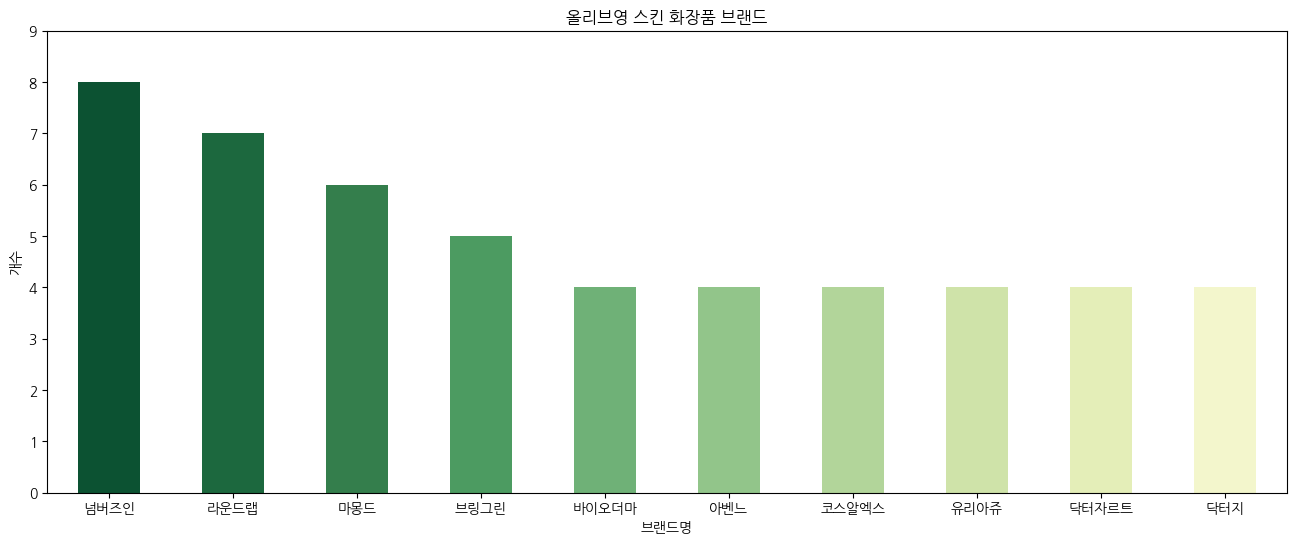

In [9]:
plt.figure(figsize=(16, 6))
sns.barplot(skin_df_r['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)
plt.title('올리브영 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 10, 1));

/tmp/ipykernel_13865/2817078440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(skin_df_m['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)


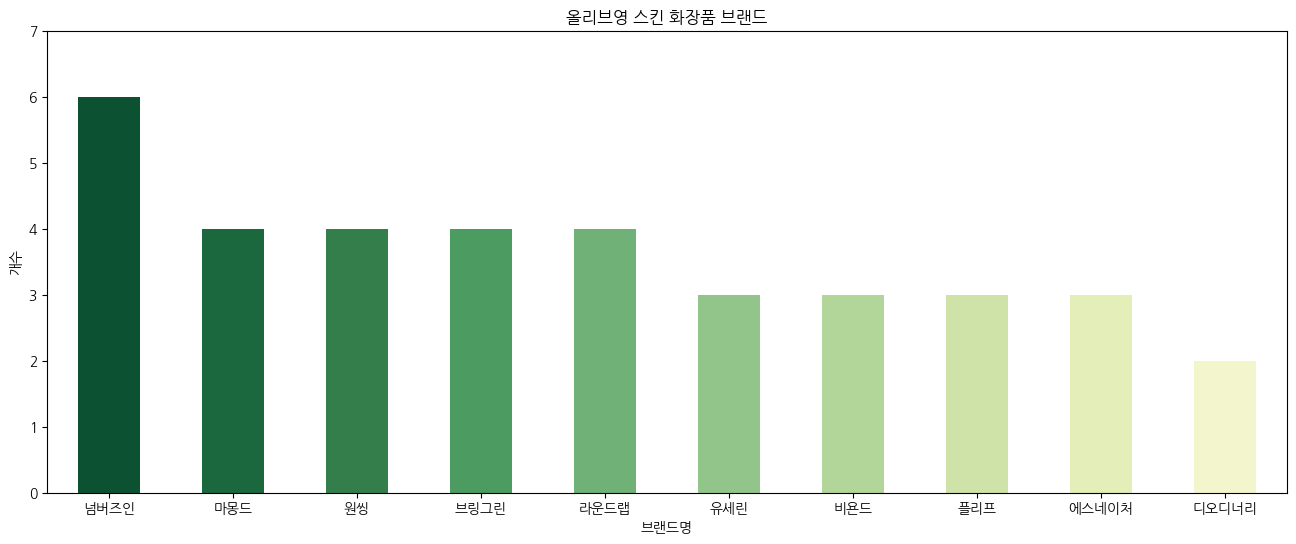

In [10]:
plt.figure(figsize=(16, 6))
sns.barplot(skin_df_m['브랜드명'].value_counts()[:10], palette='YlGn_r', width=0.5)
plt.title('올리브영 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 8, 1));

저자극

/tmp/ipykernel_13865/1240064155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)


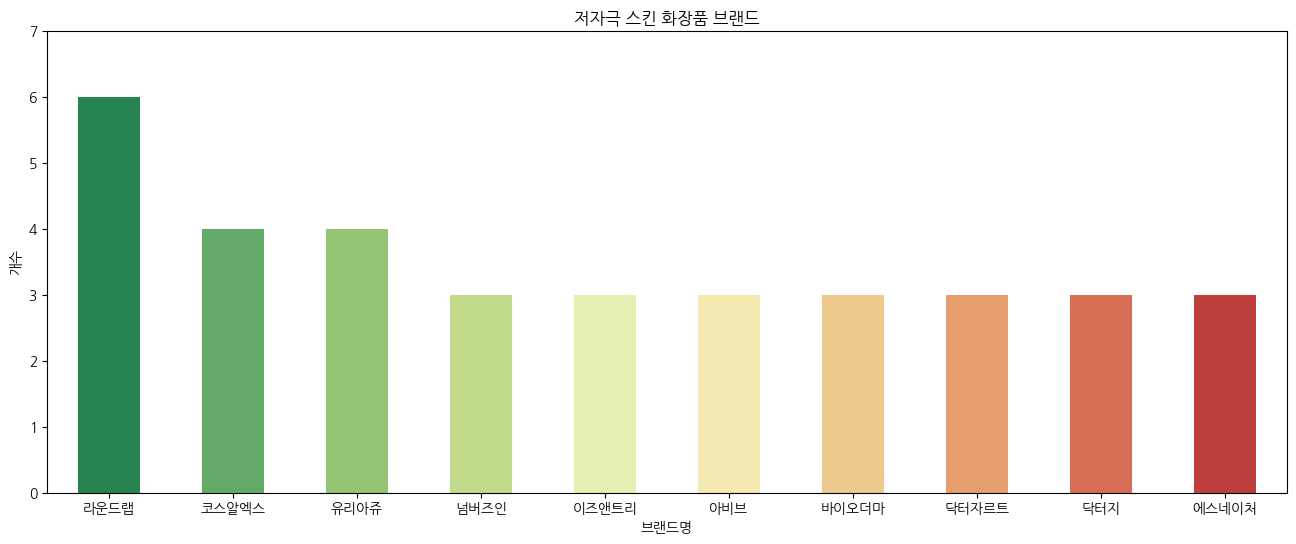

In [11]:
temp1 = skin_df_r[skin_df_r['저자극%']>=72].sort_values(by='저자극%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)
plt.title('저자극 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 8, 1));

/tmp/ipykernel_13865/2810461355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)


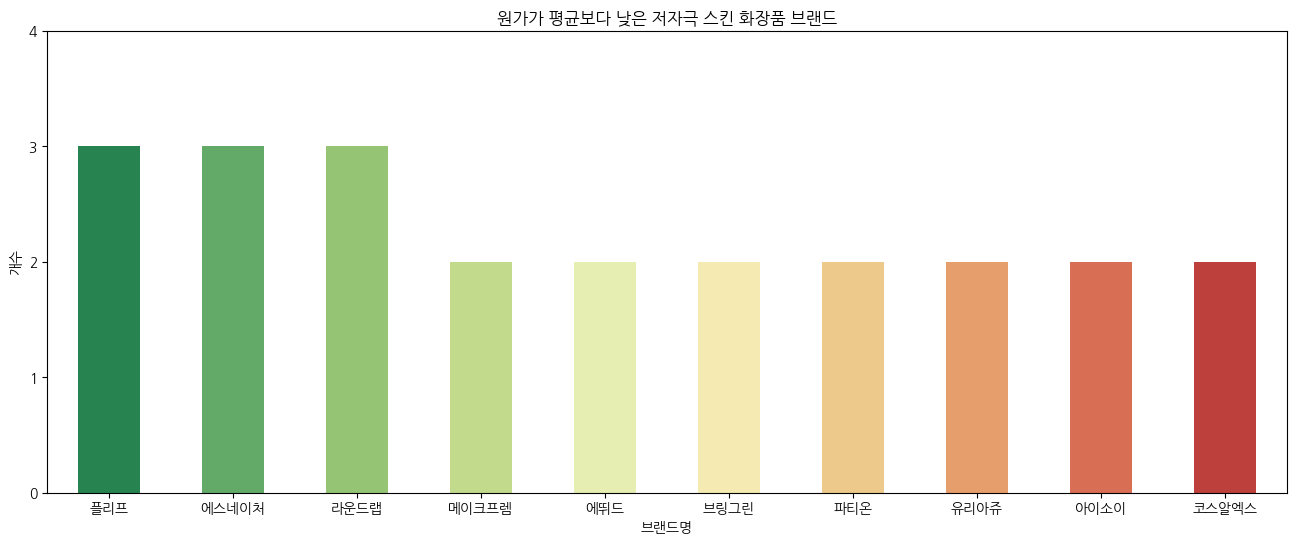

In [12]:
temp1 = skin_df_m[skin_df_m['저자극%']>=72].sort_values(by='저자극%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='RdYlGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 저자극 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 5, 1));

보습

/tmp/ipykernel_13865/3723031780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)


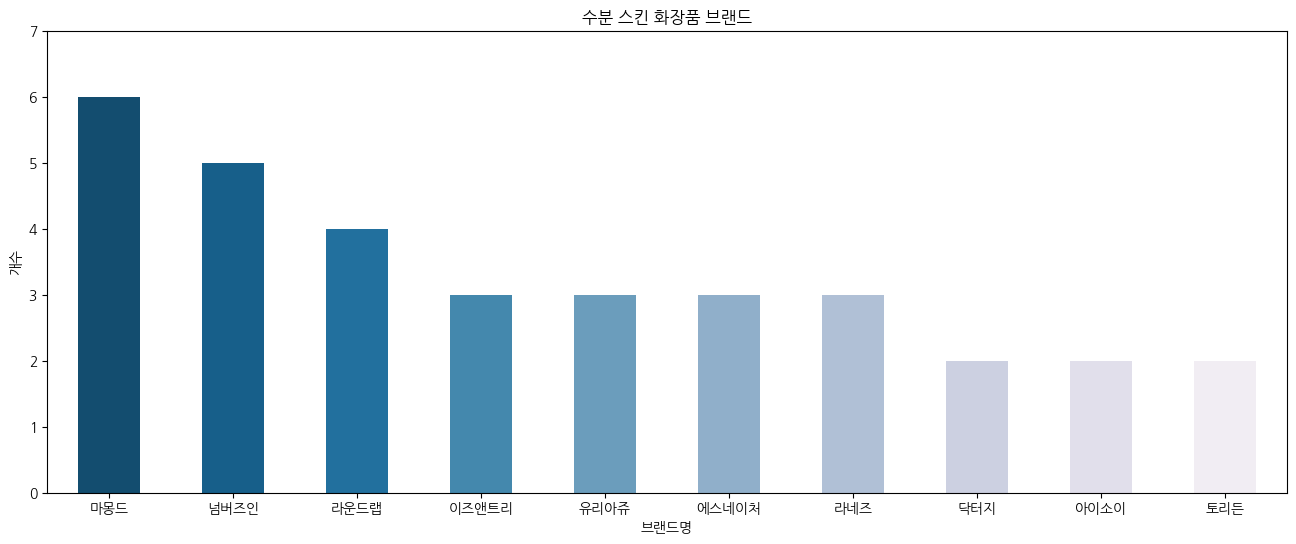

In [13]:
temp1 = skin_df_r[skin_df_r['보습%']>=45].sort_values(by='보습%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)
plt.title('수분 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 8, 1));

/tmp/ipykernel_13865/679264318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)


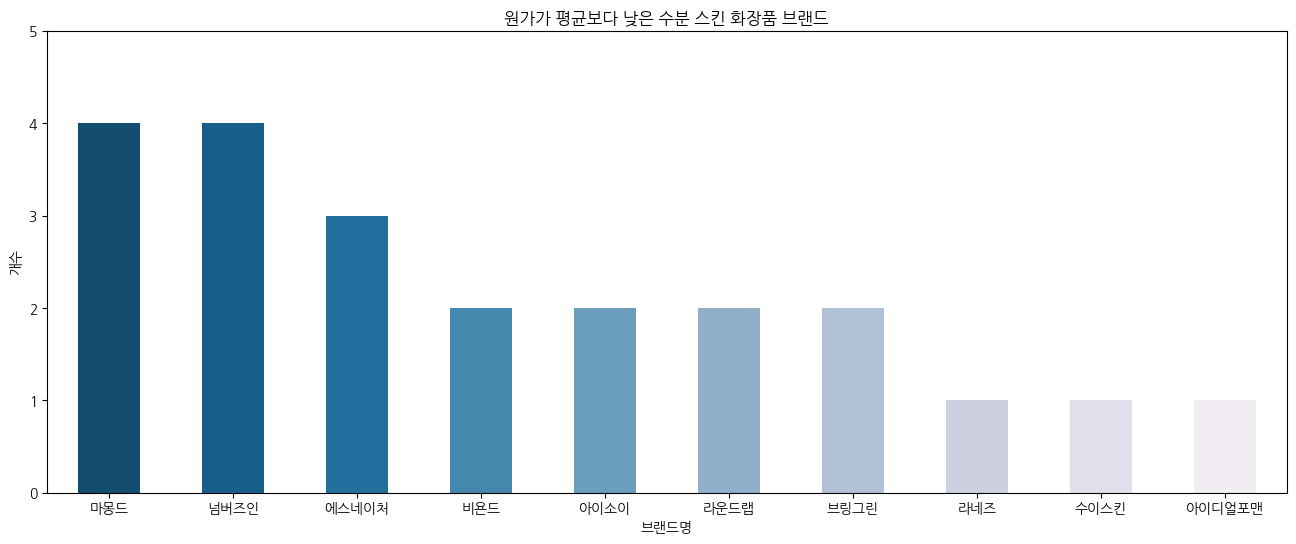

In [14]:
temp1 = skin_df_m[skin_df_m['보습%']>=45].sort_values(by='보습%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='PuBu_r', width=0.5)
plt.title('원가가 평균보다 낮은 수분 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 6, 1));

진정

/tmp/ipykernel_13865/2880632382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)


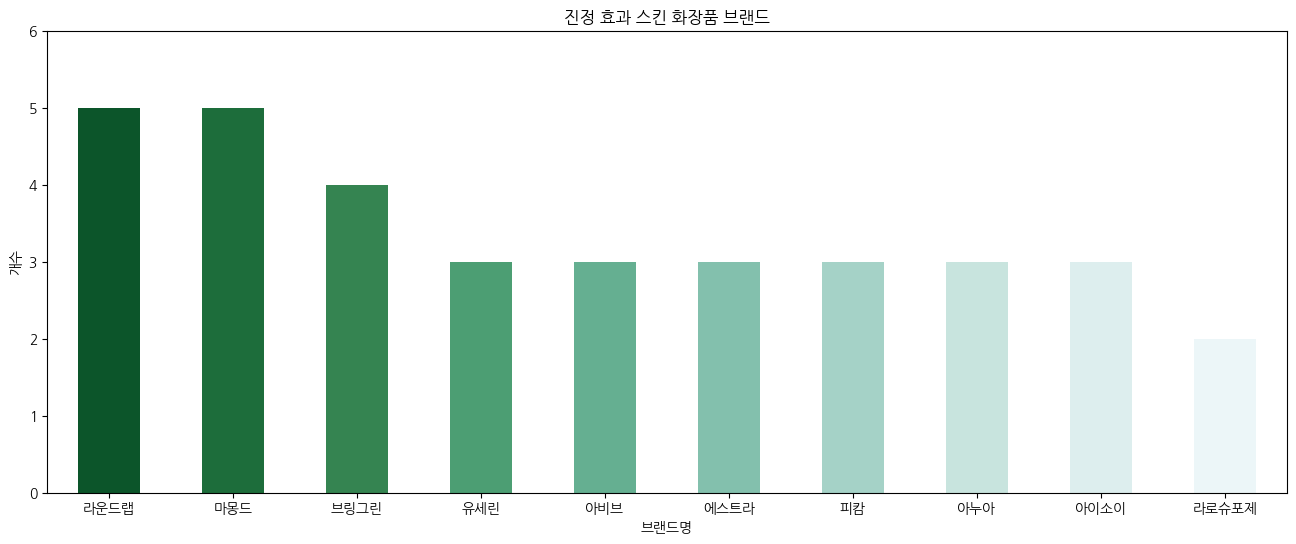

In [15]:
temp1 = skin_df_r[skin_df_r['진정%']>=45].sort_values(by='진정%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)
plt.title('진정 효과 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 7, 1));

/tmp/ipykernel_13865/3345325402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)


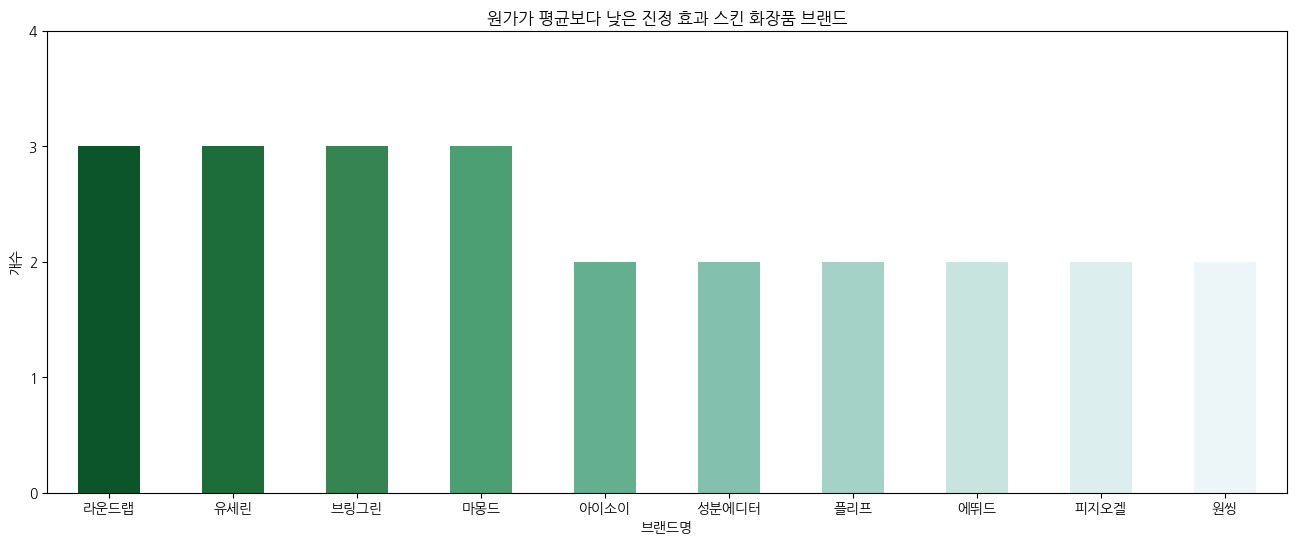

In [16]:
temp1 = skin_df_m[skin_df_m['진정%']>=45].sort_values(by='진정%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='BuGn_r', width=0.5)
plt.title('원가가 평균보다 낮은 진정 효과 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 5, 1));

주름/미백

/tmp/ipykernel_13865/419686066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)


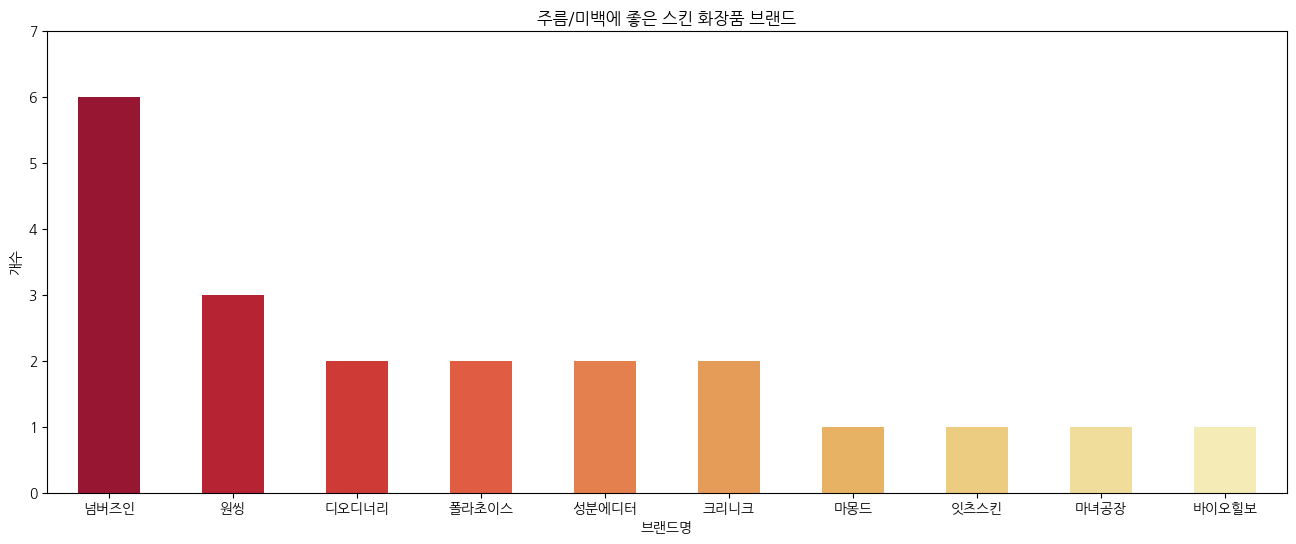

In [17]:
temp1 = skin_df_r[skin_df_r['주름/미백%']>=5].sort_values(by='주름/미백%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)
plt.title('주름/미백에 좋은 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 8, 1));

/tmp/ipykernel_13865/2870120687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)


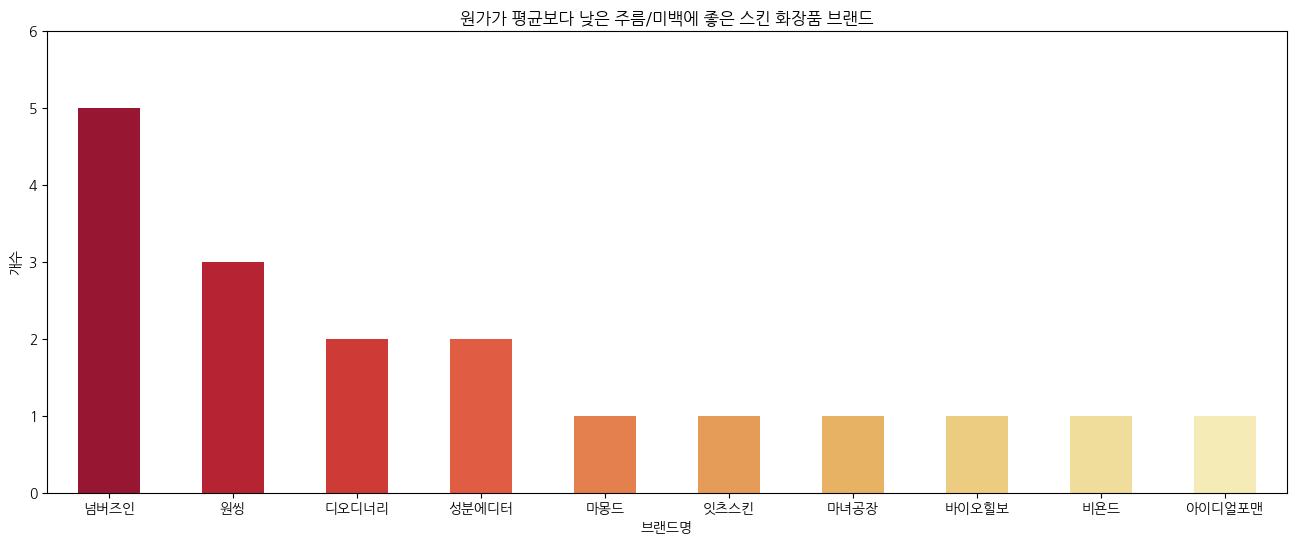

In [18]:
temp1 = skin_df_m[skin_df_m['주름/미백%']>=5].sort_values(by='주름/미백%', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(temp1['브랜드명'].value_counts()[:10], palette='YlOrRd_r', width=0.5)
plt.title('원가가 평균보다 낮은 주름/미백에 좋은 스킨 화장품 브랜드')
plt.xlabel('브랜드명')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 7, 1));